# Early Stopping with Keras

In order to early stop the learning, We can use 'EarlyStopping()' function. This is the callback function and we can use it when the learning algorithm can not improve the learning status. 

Callback function means that when you call a function, callback function calls specific function which I designated.

In kears, EarlyStopping() callback function is called in fit() function.

EarlyStopping() callback function has many option. Let's check those out!

+ monitor
    - Items to observe. **"val_loss", "val_acc"**
  
+ min_delta
    - It indicates the **minimum amount of change** to be determined to be improving. If the amount of changing is less than min_delta, it is judged that there is no improvement.

+ patience
    - Specify **how long to wait** the non-improvement epoch and not to stop immediately even though there is no improvement. If you set this value as 10, learning ends when consecutive 10 times no improvement happens.

### Import package

In [1]:
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from keras.regularizers import l2
np.random.seed(3)

Using TensorFlow backend.


### Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### split the dataset

In [3]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

### preprocessing

In [4]:
x_train = x_train.reshape(50000, 784).astype("float32") / 255.0
x_val = x_val.reshape(10000, 784).astype("float32") / 255.0
x_test = x_test.reshape(10000, 784).astype("float32") / 255.0

### One-hot encoding process

In [5]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

### Modeling

In [6]:
model = Sequential()
model.add(Dense(units = 50, input_dim = 28*28, activation = "relu", W_regularizer=l2(0.01)))
model.add(Dense(units = 30, activation= "relu", W_regularizer=l2(0.01)))
model.add(Dense(units= 10, activation="relu",W_regularizer=l2(0.01)))
model.add(Dense(units= 10, activation="softmax",W_regularizer=l2(0.01)))

model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])

C:\Users\infoe\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_regularizer=<keras.reg..., input_dim=784, activation="relu", units=50)`
  from ipykernel import kernelapp as app
C:\Users\infoe\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_regularizer=<keras.reg..., activation="relu", units=30)`
  app.launch_new_instance()
C:\Users\infoe\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_regularizer=<keras.reg..., activation="relu", units=10)`
C:\Users\infoe\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_regularizer=<keras.reg..., activation="softmax", units=10)`


### Learning

In [7]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20)
hist = model.fit(x_train, y_train, epochs=1000, batch_size=32, 
                 validation_data=(x_val, y_val), callbacks=[early_stopping])

Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 [==============================] - 20s 408us/step - loss: 1.1935 - acc: 0.7163 - val_loss: 1.1089 - val_acc: 0.7328
Epoch 2/1000
50000/50000 [==============================] - 19s 378us/step - loss: 0.9925 - acc: 0.7760 - val_loss: 0.9935 - val_acc: 0.7491
Epoch 3/1000
50000/50000 [==============================] - 18s 368us/step - loss: 0.9630 - acc: 0.7832 - val_loss: 0.9464 - val_acc: 0.7857
Epoch 4/1000
50000/50000 [==============================] - 19s 381us/step - loss: 0.9452 - acc: 0.7895 - val_loss: 0.9294 - val_acc: 0.7882
Epoch 5/1000
50000/50000 [==============================] - 19s 380us/step - loss: 0.9331 - acc: 0.7936 - val_loss: 0.9184 - val_acc: 0.7937
Epoch 6/1000
50000/50000 [==============================] - 19s 373us/step - loss: 0.9272 - acc: 0.7940 - val_loss: 0.9477 - val_acc: 0.7880
Epoch 7/1000
50000/50000 [==============================] - 19s 374us/step - loss: 0.9215 - acc: 0.7966 

### Display

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

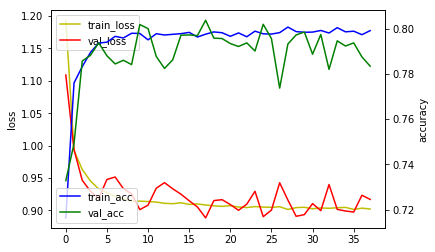

In [9]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history["loss"], "y", label = "train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label = "val_loss")

acc_ax.plot(hist.history["acc"], "b", label="train_acc")
acc_ax.plot(hist.history["val_acc"], "g", label="val_acc")

loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc = "upper left")
acc_ax.legend(loc = "lower left")

plt.show()

In [10]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print("")
print("loss : {}".format(loss_and_metrics[0]))
print("accuracy : {}".format(loss_and_metrics[1]))

10000/10000 [==============================] - 0s 44us/step

loss : 0.929823195362091
accuracy : 0.7799
